### Unsupervised Learning: Principal Component Analysis
#### PCA: Visualize human faces

- Dataset: 1000 human faces dataset (1000_faces.csv.zip)
- Learning Date: 3-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [10]:
from IPython.display import YouTubeVideo

# YouTubeVideo('', width = 720, height = 405)

In [11]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
print(f'pandas version: {pd.__version__}')
print(f'numpy verson: {np.__version__}')
print(f'seaborn verson: {sns.__version__}')

pandas version: 1.5.2
numpy verson: 1.25.2
seaborn verson: 0.12.2


In [13]:
# print datetime now

pd.Timestamp.now()

Timestamp('2023-12-20 05:12:10.580467')

### read faces data

In [14]:
file_name = '1000_faces.csv.zip'
url = f'https://github.com/prasertcbs/basic-dataset/raw/master/{file_name}'
url

'https://github.com/prasertcbs/basic-dataset/raw/master/1000_faces.csv.zip'

In [15]:
# read faces data to a dataframe

df = pd.read_csv(url)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
149,179,181,180,181,180,181,180,182,180,180,...,172,175,173,174,173,174,173,174,172,173
67,54,49,44,42,44,45,40,36,36,34,...,74,70,72,78,82,84,89,108,150,194
844,28,28,29,29,29,27,23,21,23,25,...,92,130,178,192,191,192,195,198,201,202
854,21,29,51,71,71,65,74,91,98,100,...,27,22,37,45,29,27,36,31,31,44
12,121,83,58,41,37,36,33,33,37,37,...,137,125,133,140,138,132,84,85,162,219


In [16]:
df.shape

(1000, 9216)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 9216 entries, 0 to 9215
dtypes: int64(9216)
memory usage: 70.3 MB


In [18]:
X = df.to_numpy()
X

array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       ...,
       [ 56,  57,  55, ...,  70,  71,  72],
       [ 54,  26,  16, ..., 191, 146,  48],
       [ 70,  67,  62, ...,  50,  39,  42]])

In [19]:
n = np.random.randint(0, X.shape[0])
n

808

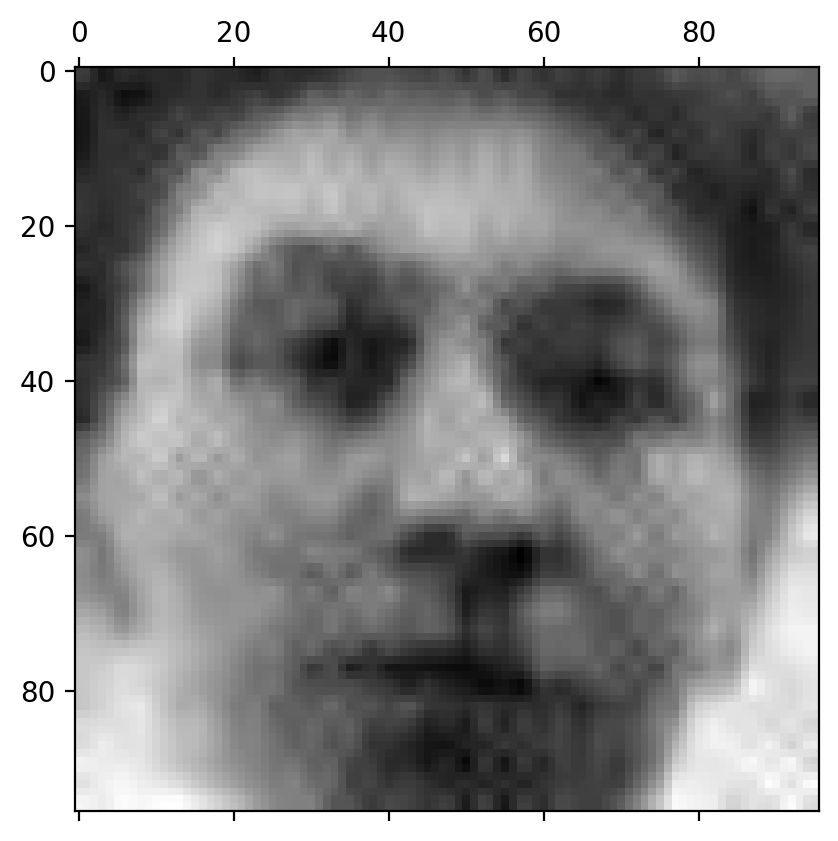

In [20]:
n = np.random.randint(0, X.shape[0])
plt.matshow(X[n].reshape(96, -1), cmap = 'gray')

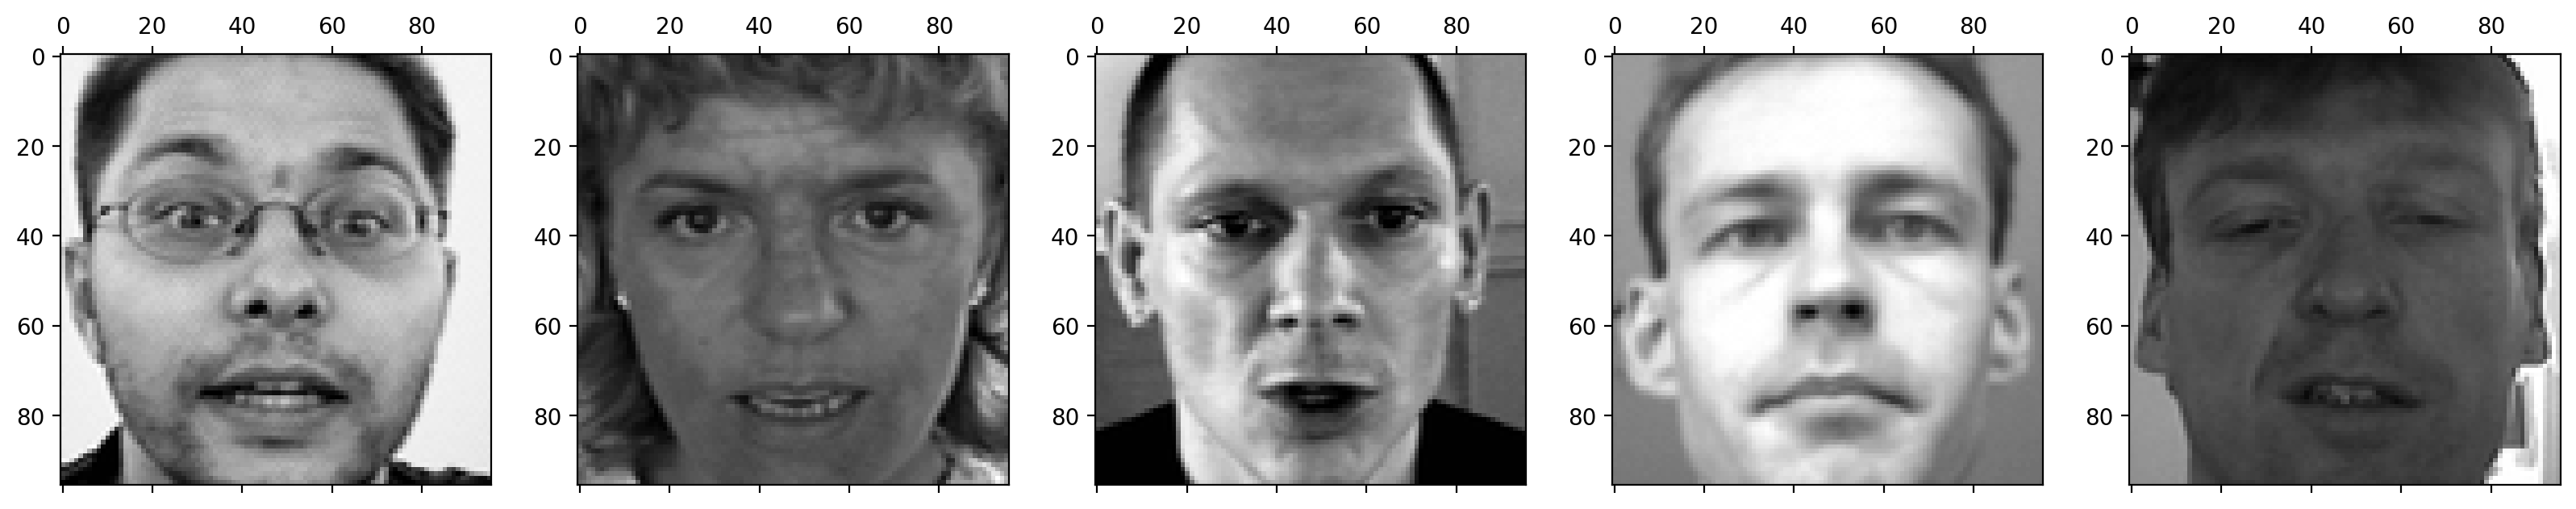

In [21]:
# specify n

n = 5

fig, ax = plt.subplots(1, n, figsize = (20, 4))

[ax[i].matshow(X[i].reshape(96, -1), cmap = 'gray') for i in range(n)];

### Principal Component Analysis (PCA)

In [22]:
# import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Standardized data (mean = 0, sd = 1)

In [23]:
X_train = df.to_numpy()
scaler = StandardScaler()
scaler

StandardScaler()

In [24]:
scaler.fit(X_train) # fit on training set only

StandardScaler()

In [25]:
X_train_t = scaler.transform(X_train)
X_train_t

array([[ 0.93180631,  1.03062319,  1.08003511, ..., -1.29685855,
        -1.33752923, -1.35041775],
       [-0.4673419 , -0.26877171, -0.30068188, ...,  1.49129419,
         1.25959042,  0.6990417 ],
       [ 0.86580875,  0.93587564,  0.97067139, ..., -1.3855725 ,
        -1.38795874, -1.40071123],
       ...,
       [-0.73133213, -0.67483262, -0.65611398, ..., -0.51110642,
        -0.50544235, -0.5080019 ],
       [-0.75773115, -1.09442889, -1.18926213, ...,  1.02237759,
         0.44011092, -0.8097628 ],
       [-0.54653897, -0.53947898, -0.56042072, ..., -0.76457485,
        -0.90887841, -0.88520303]])

In [26]:
len(X_train_t)

1000

In [27]:
X_train.shape

(1000, 9216)

In [28]:
# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

pca = PCA(.95)
pca

PCA(n_components=0.95)

In [29]:
pca.fit(X_train_t)

PCA(n_components=0.95)

In [30]:
pca.n_components_

172

In [31]:
X_train_t = pca.transform(X_train_t) # apply dimensionally reduction to X_train_t

In [32]:
X_train_t

array([[ 35.81103823, -33.21150407,  13.83981403, ...,   2.23955525,
          1.08340432,  -0.86989788],
       [ 74.89583711,   0.14734705, -10.40521271, ...,   0.08189084,
          0.74834067,  -1.2335    ],
       [ 41.75367275,  17.96221171,  27.54018152, ...,  -0.07544234,
         -0.14617937,  -1.88035033],
       ...,
       [ 43.61037544,  -0.95543571,  36.28943002, ...,   1.54483962,
          1.32780533,   0.68982048],
       [-12.19828689,  18.83890348,  -4.33600954, ...,   1.98326704,
          0.45716823,  -2.52841212],
       [-41.45398689,  33.55935596,  20.67104619, ...,  -0.3147012 ,
          0.16555486,  -1.85851658]])

In [33]:
X_train_t.shape

(1000, 172)

In [34]:
pca.components_.shape

(172, 9216)

In [35]:
def scree_plot(X, n_components, with_cumulative = False, show_data_label = False, figsize = (10, 7)):

    '''
    PCA scree plot with cumulative
    '''
    
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components+1)
    pca = PCA(n_components = max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize = figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle = '--', marker = marker, label = 'cumulative')
        
    plt.plot(x, y1, linestyle = '-', marker = marker, label = 'individual')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()

    if with_cumulative:
        [plt.axhline(y = xl, color = '.7', linestyle = '--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis = 'x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags = ['refs_ok']), 
                            np.nditer(y1, flags = ['refs_ok']),
                            np.nditer(y2, flags = ['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize = 10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize = 10)

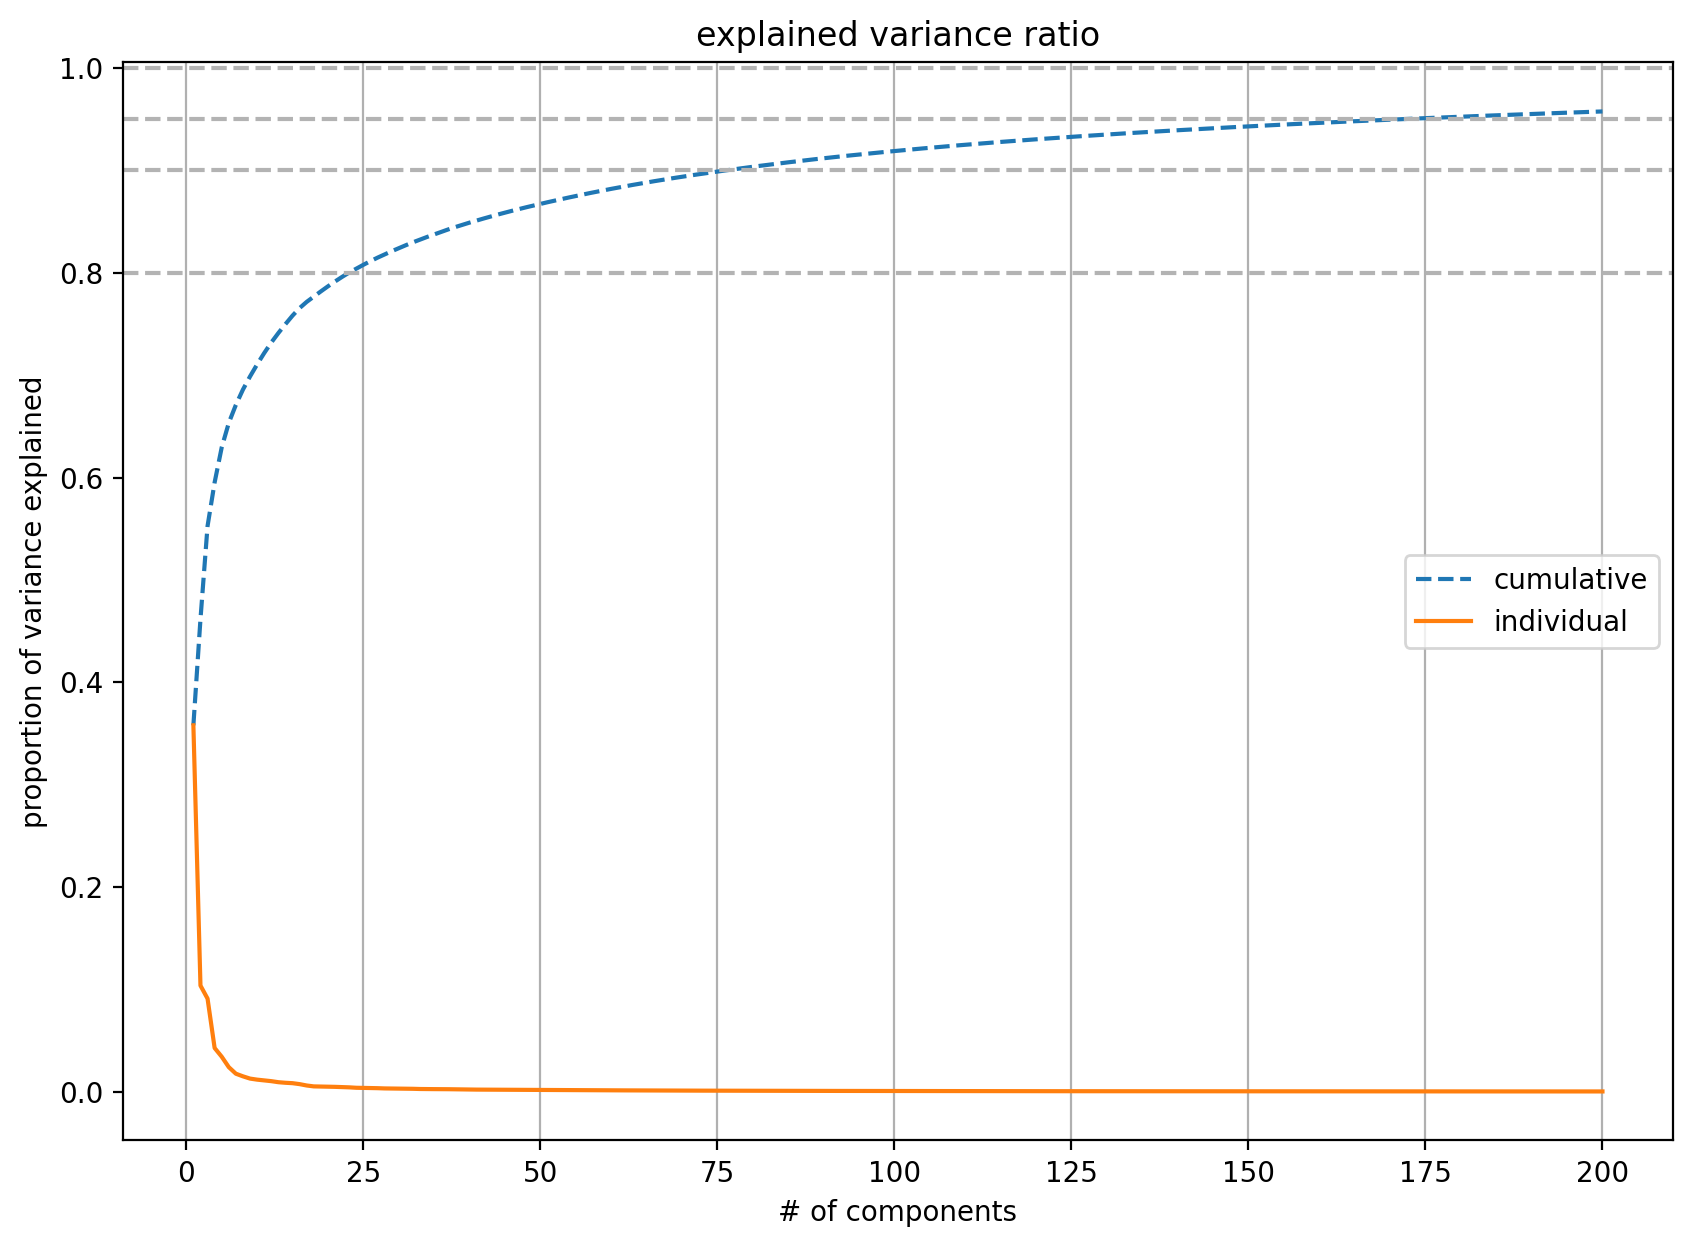

In [36]:
scree_plot(X_train, 200, True, False)

In [37]:
X_train[:5]

array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       [176, 174, 174, ..., 142, 142, 140],
       [ 50,  47,  44, ..., 175, 175, 165]])

In [38]:
X_train.shape

(1000, 9216)

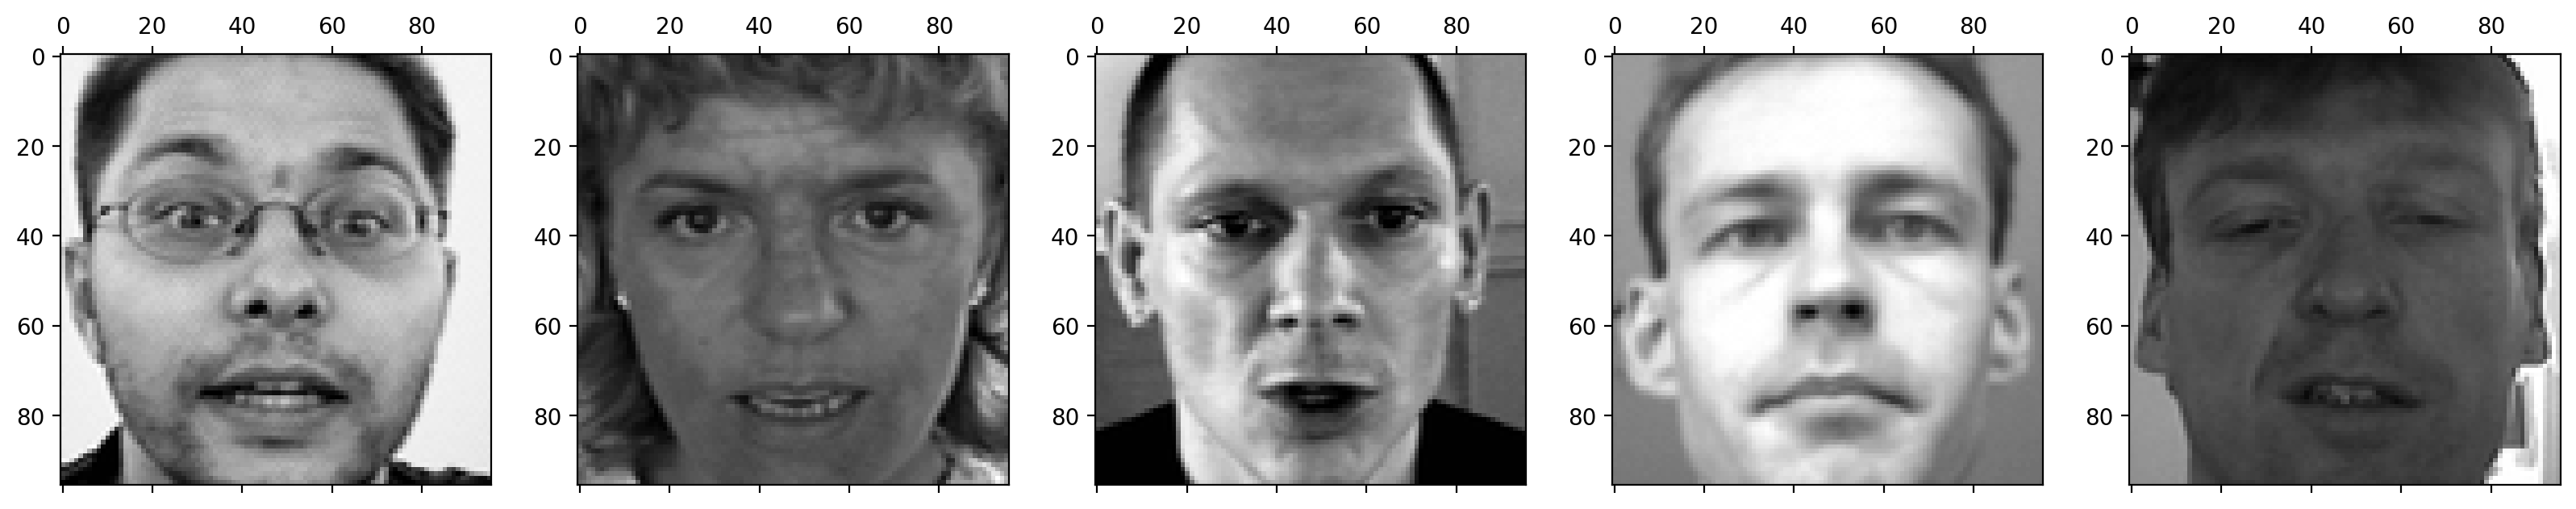

In [39]:
XT = X_train # original X_train
n = 5

fig, ax = plt.subplots(1, n, figsize = (20, 4))

[ax[i].matshow(XT[i].reshape(96, -1), cmap = 'gray') for i in range(n)];

In [40]:
# X_train_t (Apply dimensionality reduction) %*% pca.components_

XP = np.dot(X_train_t, pca.components_).round(4) # pca.transform(X)
print(XP)
print(XP.shape)

[[ 1.4388  1.3651  1.3416 ... -0.7116 -0.5733 -0.5412]
 [-0.244  -0.3244 -0.4417 ...  1.0079  1.0445  0.8522]
 [ 0.5882  0.6779  0.7297 ... -1.4034 -1.4056 -1.5783]
 ...
 [-0.7947 -0.8023 -0.7045 ... -0.2573 -0.2362 -0.2507]
 [-0.8663 -0.9362 -1.052  ...  0.1947  0.153   0.0655]
 [-0.4588 -0.5369 -0.5747 ... -0.4644 -0.5467 -0.631 ]]
(1000, 9216)


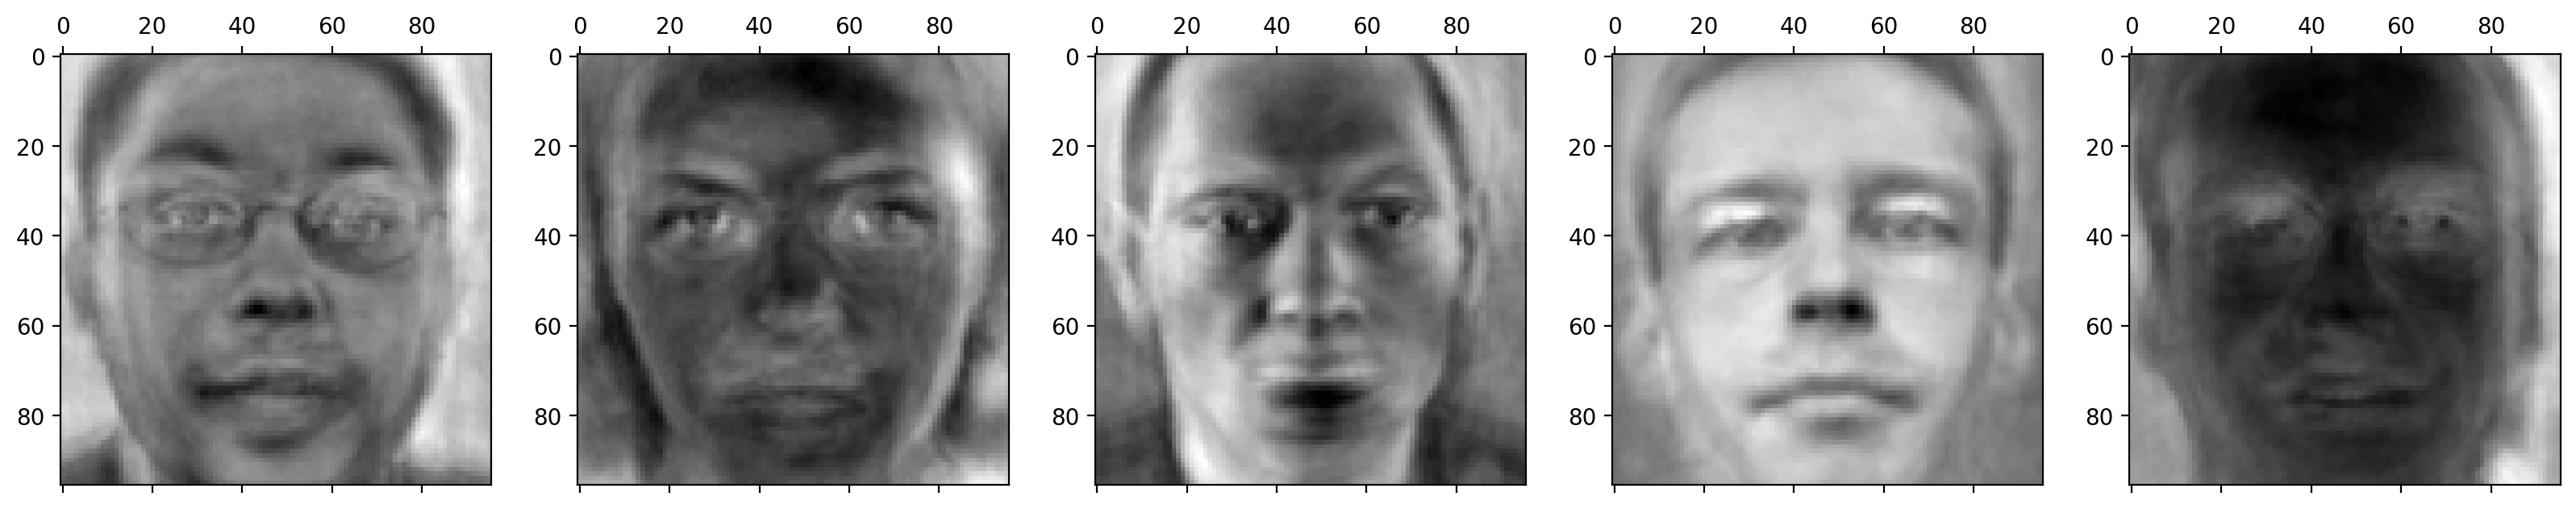

In [41]:
n = 5
fig, ax = plt.subplots(1, n, figsize = (20, 4))

[ax[i].matshow(XP[i].reshape(96, -1), cmap = 'gray') for i in range(n)];

#### compare different components

In [42]:
def plot_varying_components(dfX, n_img = 10, n_components = [10, 20, 30, 50, 100, 200, 300], img_shape = (28, 28)):

    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train = dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize = (20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components = n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize = (20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]

n_component = 10, (600, 10)
n_component = 110, (600, 110)
n_component = 210, (600, 210)
n_component = 310, (600, 310)
n_component = 410, (600, 410)


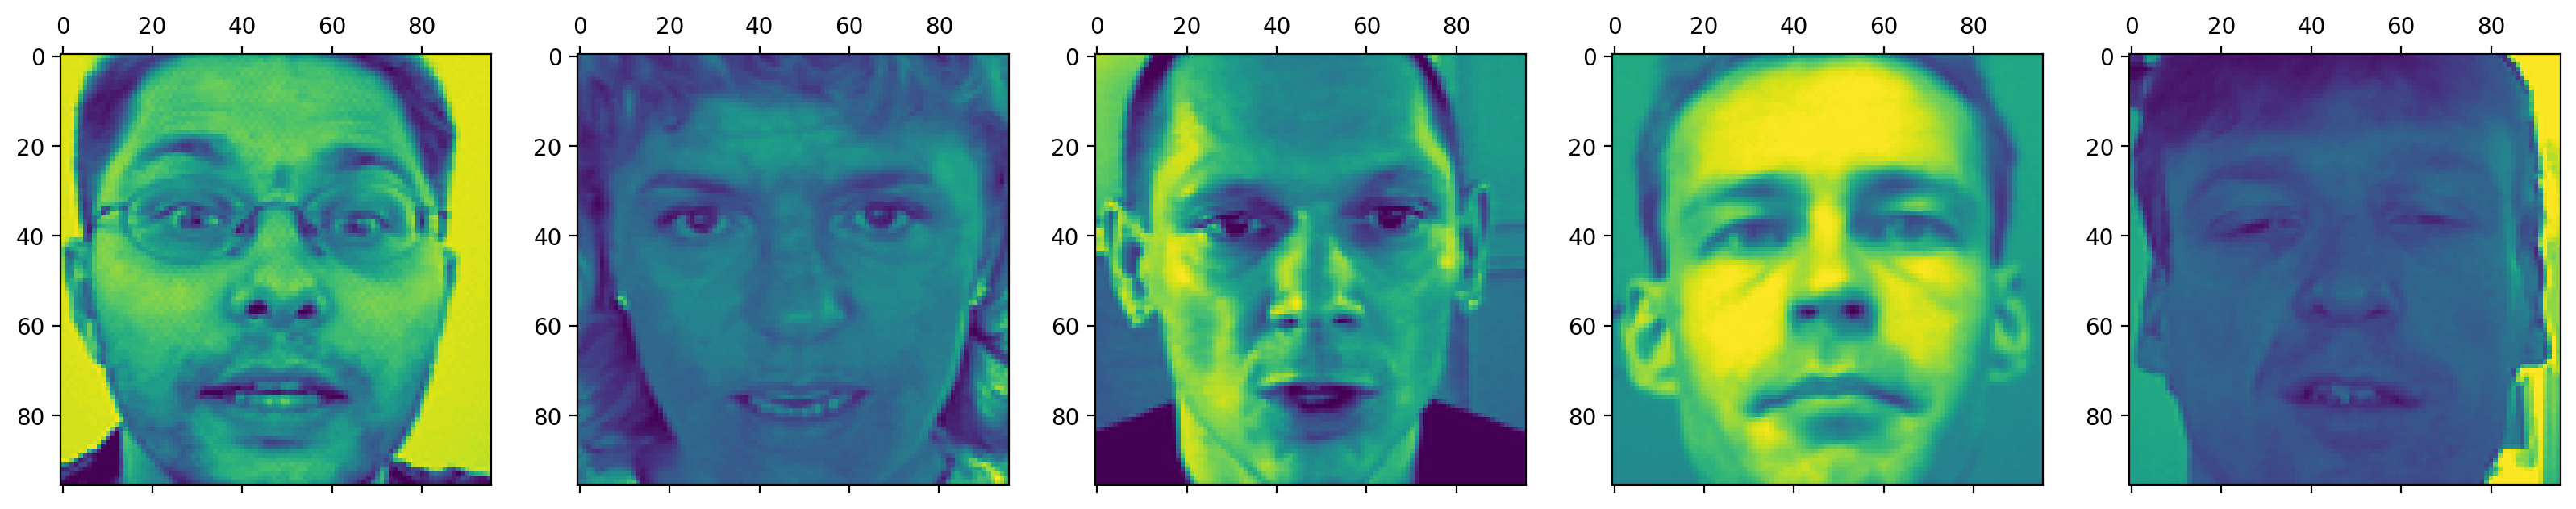

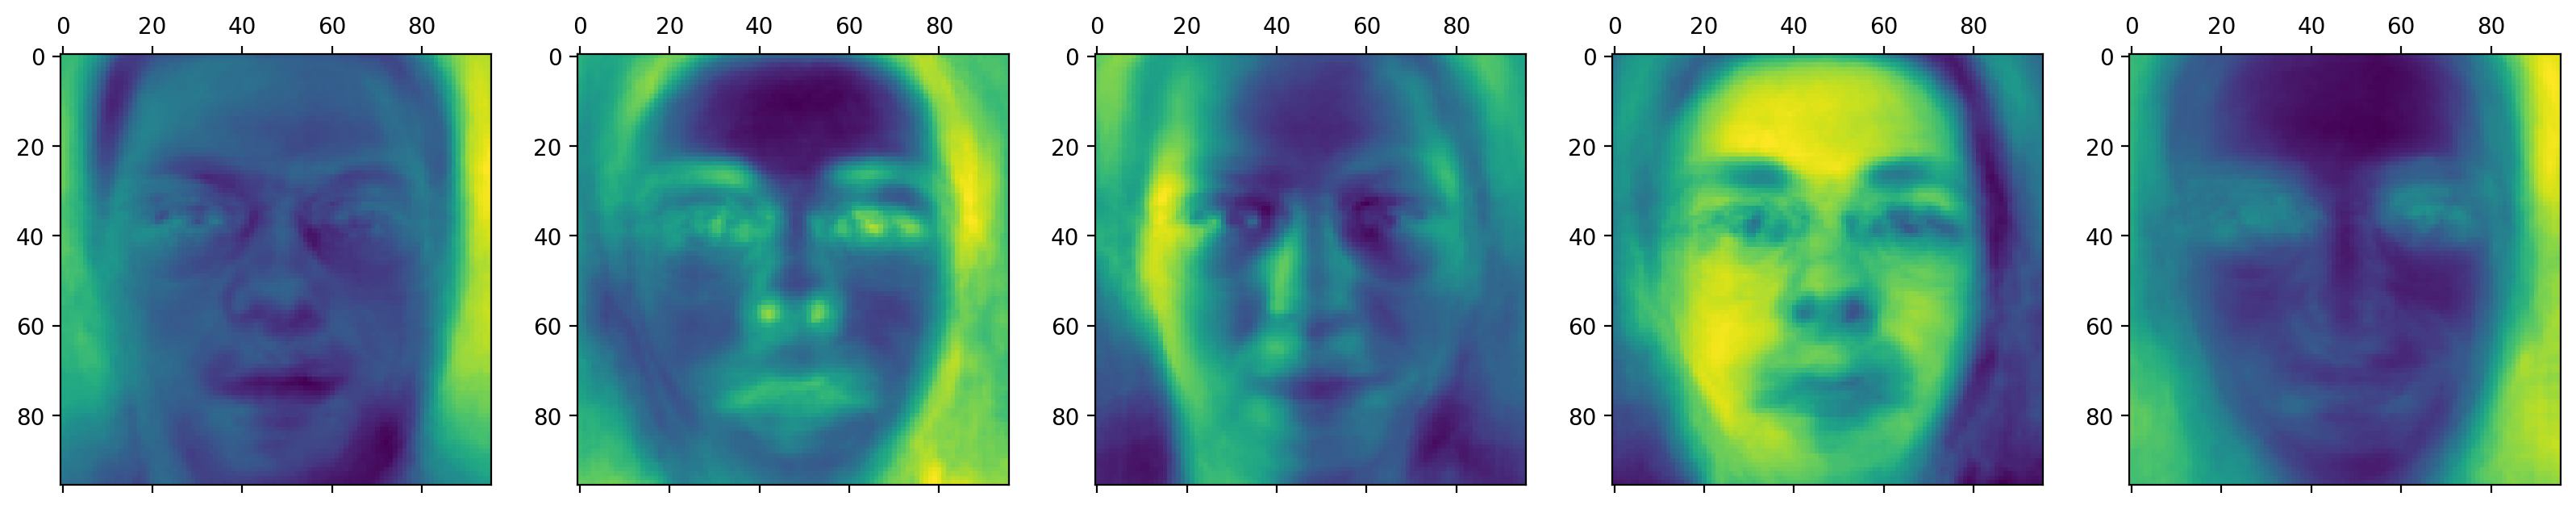

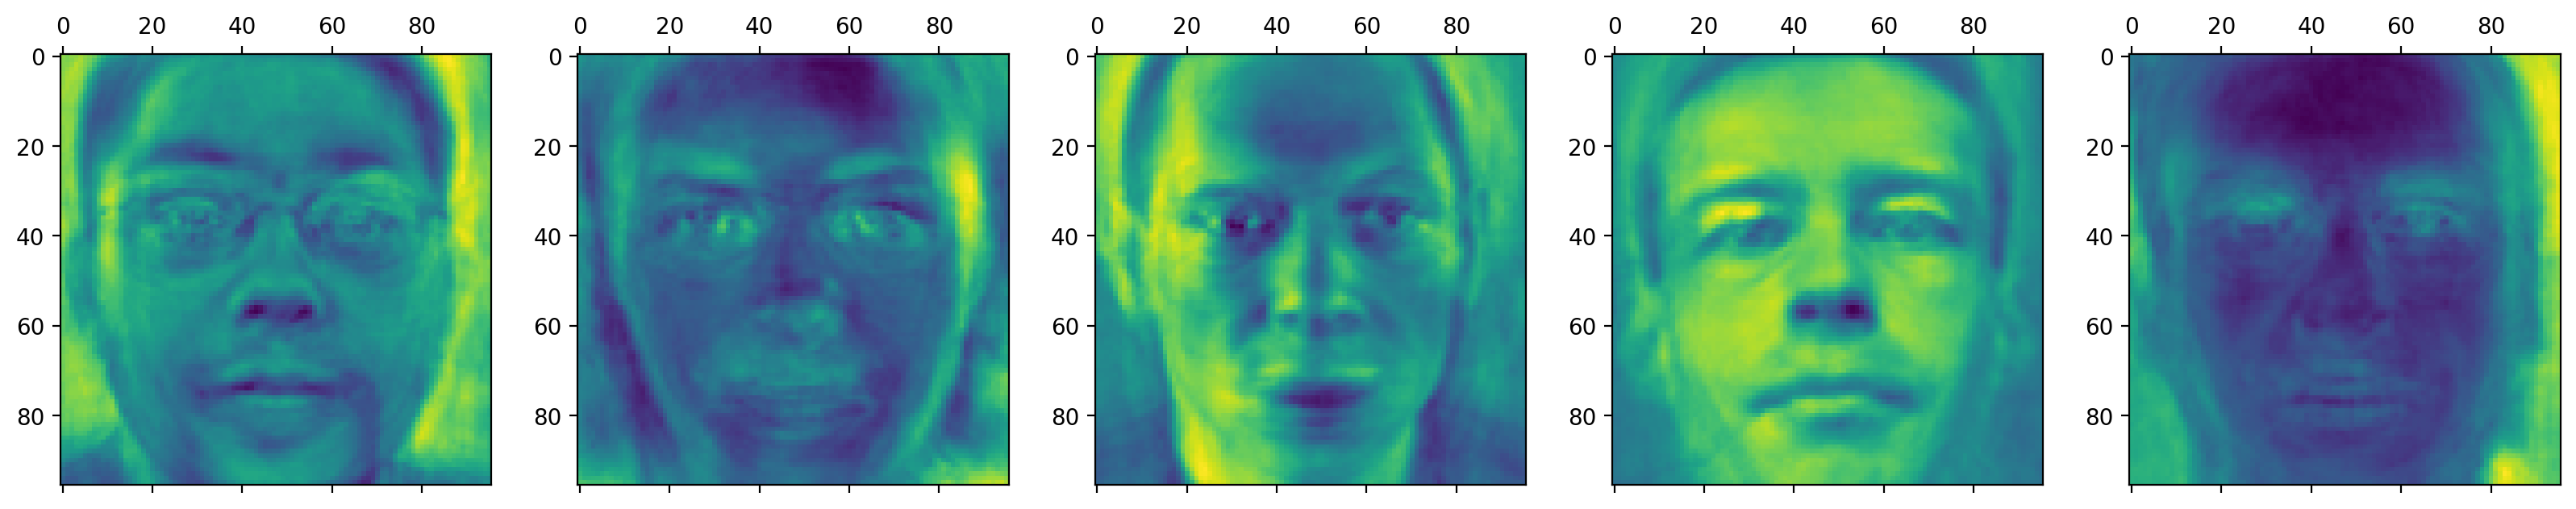

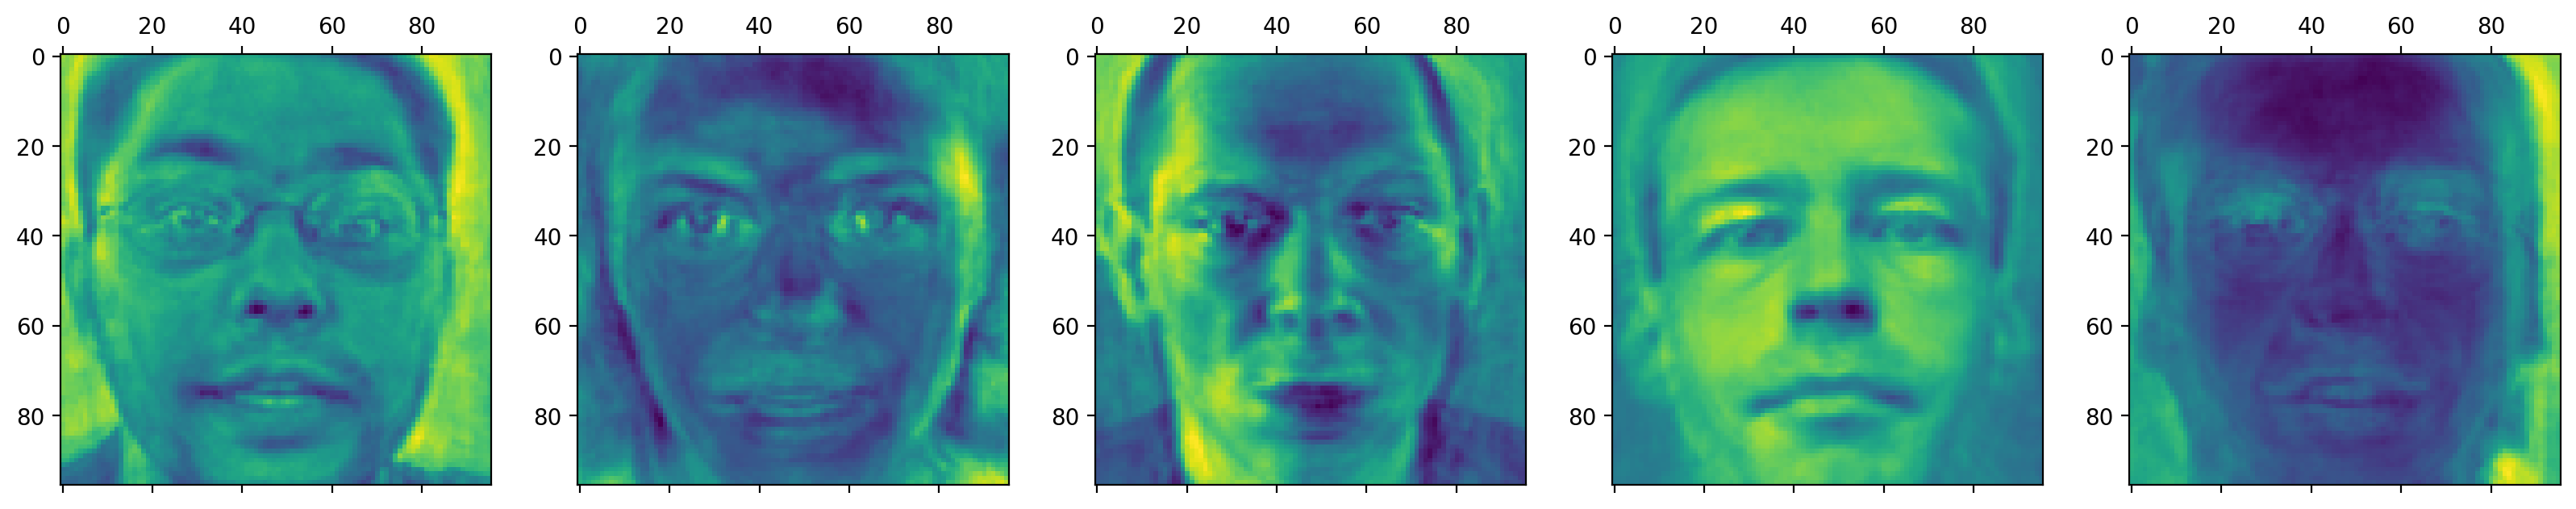

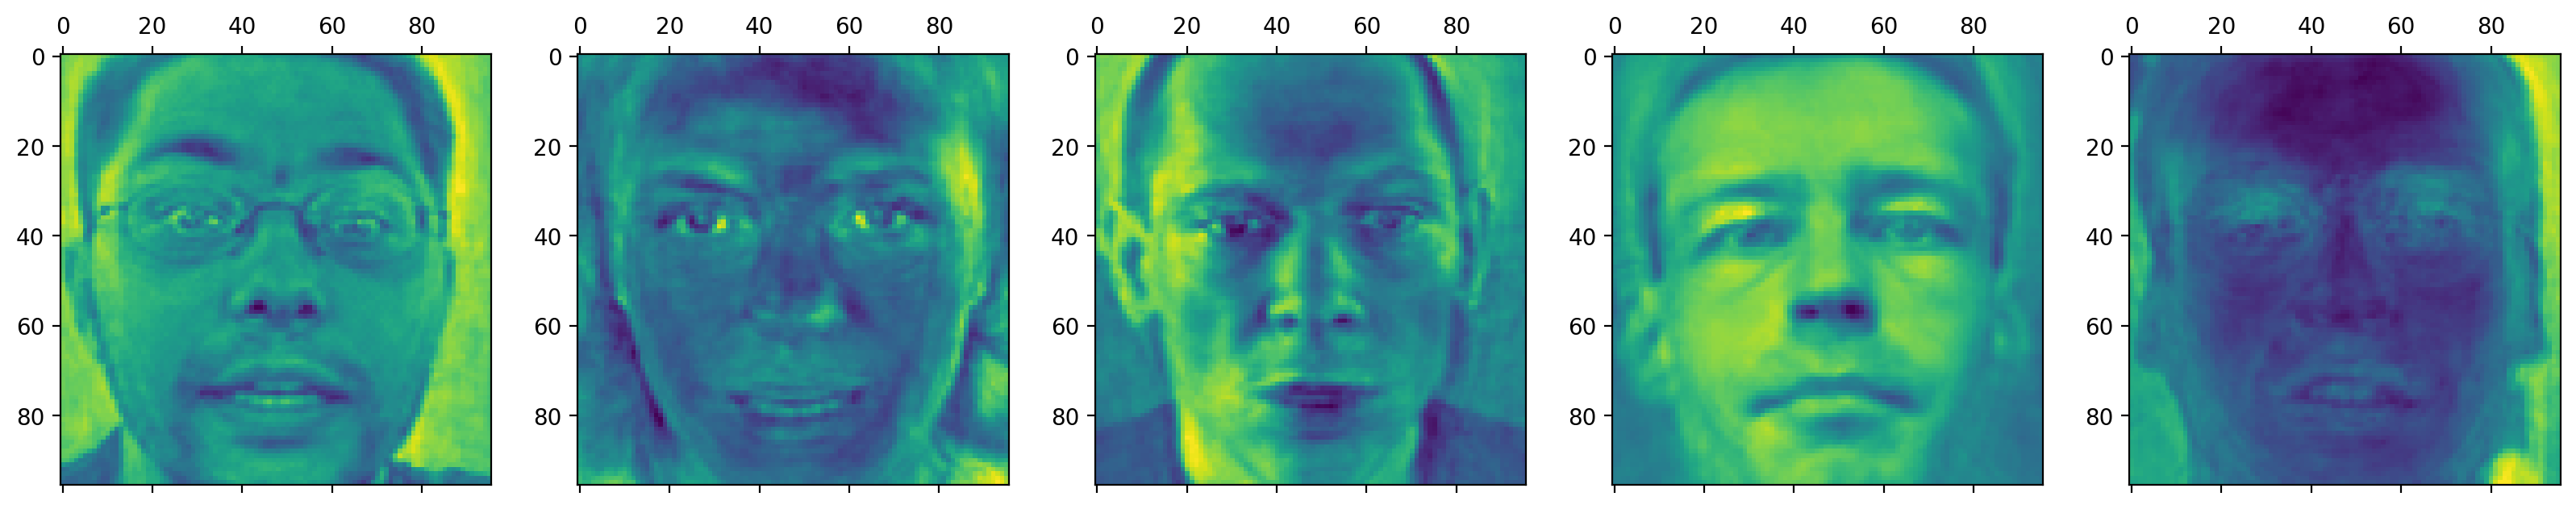

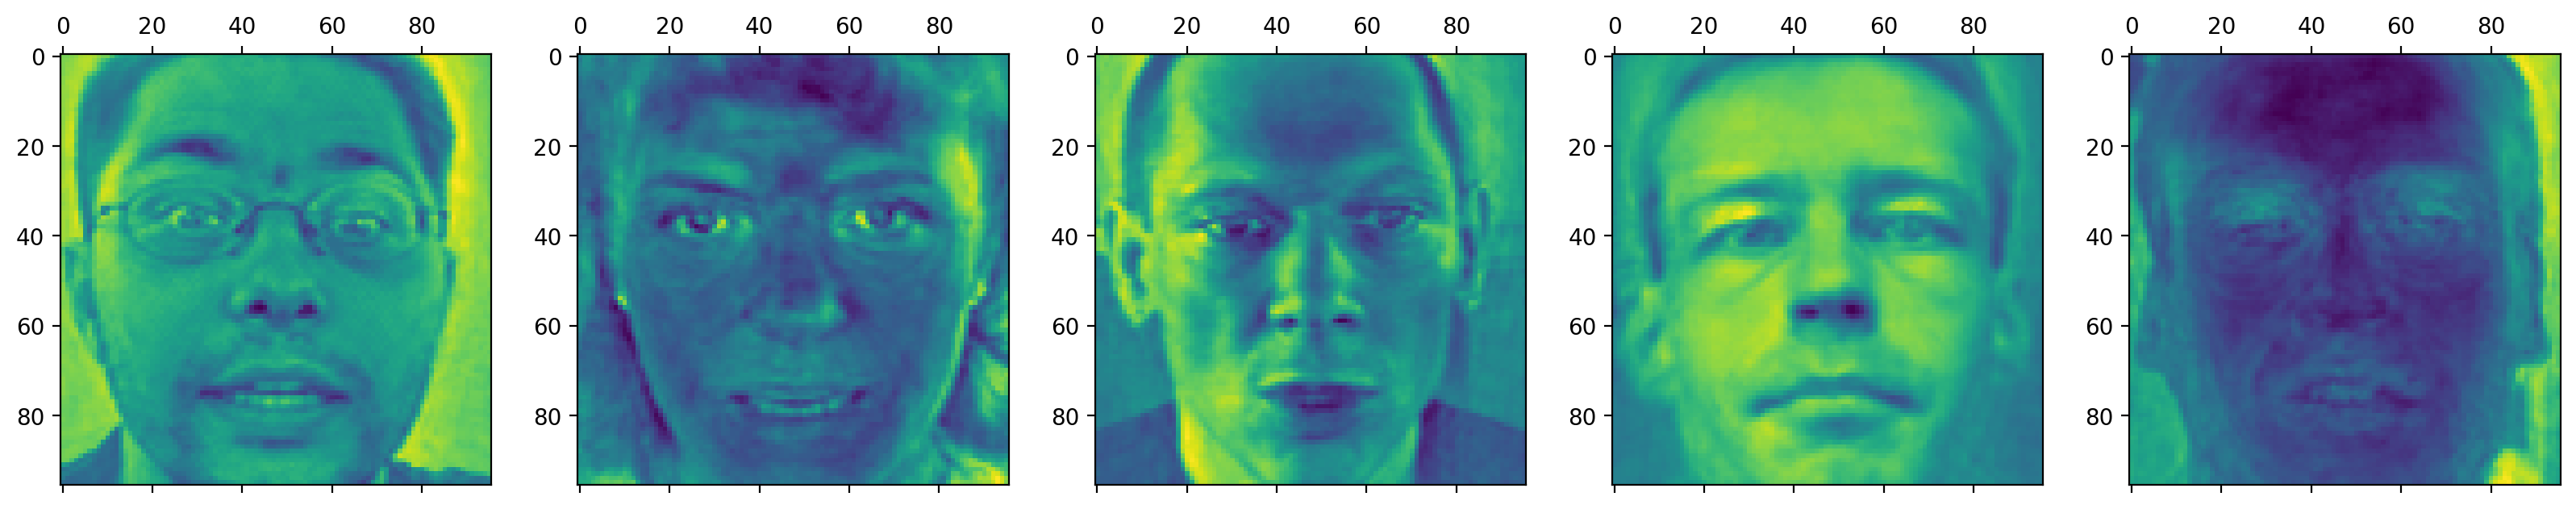

In [43]:
plot_varying_components(df[:600], 5, list(range(10, 501, 100)), img_shape=(96, 96))